# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
material = "copper"

In [4]:
def printMeaningful(value, sigma=0.0):
    tennage = 0
    if sigma == 0:
        sigma = value
    while sigma < 1:
        tennage -= 1
        sigma *= 10
        value *= 10
    while sigma > 10:
        tennage += 1
        sigma /= 10
        value /= 10
    return "({:.1f} \\pm {:.1f}) \\cdot 10^{}{}{}".format(value, sigma, "{", tennage, "}")

In [5]:
printMeaningful(0.2)

'(2.0 \\pm 2.0) \\cdot 10^{-1}'

# Inputs

## frequency

### Inputs

In [6]:
N = []
f = []

with open(f"frequencies/{material}", "r") as file:
    print(file.readline())
    instrum_f = float(file.readline().strip())
    print(file.readline())
    for line in file:
        temp = line.strip().split()
        N.append(int(temp[0]))
        f.append(float(temp[1]))
    N = np.array(N)
    f = np.array(f)

instrum_f, РєР“С†

n	fРёР·Рј, РєР“С†



In [7]:
N

array([1, 2, 3, 4, 5, 6])

In [8]:
f

array([ 3.1588,  6.3146,  9.4853, 12.6497, 15.8044, 18.9711])

### Table

In [9]:
for i in range(len(N)):
    print("\t\t\hline\n\t\t", end = "")
    print("{}&{}\\\\".format(N[i], f[i]))

		\hline
		1&3.1588\\
		\hline
		2&6.3146\\
		\hline
		3&9.4853\\
		\hline
		4&12.6497\\
		\hline
		5&15.8044\\
		\hline
		6&18.9711\\


### Units

In [10]:
f *= 1000 # kHz -> Hz
instrum_f *= 1000 # kHz -> Hz

In [11]:
f, instrum_f

(array([ 3158.8,  6314.6,  9485.3, 12649.7, 15804.4, 18971.1]), 0.1)

## Sample

### Input

In [12]:
d = []
with open(f"samples/{material}", "r") as file:
    print(file.readline())
    L, sigma_L = (float(i) for i in file.readline().strip().split())
    print(file.readline())
    m, sigma_m = (float(i) for i in file.readline().strip().split())
    print(file.readline())
    instrum_d = (float(file.readline().strip()))
    print(file.readline())
    for line in file:
        d.append(float(line.strip()))
    d = np.array(d)

L sigma_L

m sigma_m

sigma_d

d



In [13]:
d

array([12.11, 12.1 , 12.11, 12.11, 12.11])

### Table

### Units

In [14]:
d /= 1000 # mm -> m 
instrum_d /= 1000 # mm -> m 
L /= 1000 # mm -> m 
sigma_L /= 1000 # mm -> m
m /= 1000 # g -> kg
sigma_m /= 1000 # g -> kg


In [19]:
printMeaningful(m, sigma_m)

'(410.0 \\pm 1.0) \\cdot 10^{-4}'

## Bar

### Input

### Table

### Units

# Speed of sound

Permutations

$y = \Omega\\$
$x = M\\$
$y = kx\\$

In [ ]:
y = mean_omegas
x = M

mean_xy = np.mean(x * y)
mean_x = np.mean(x)
mean_x2 = np.mean(x**2)
mean_y = np.mean(y)
mean_y2 = np.mean(y**2)

In [ ]:
k = (mean_xy)/(mean_x2)
k

5.1852701269186305e-08

$k = \frac{2\pi N}{tm}$

In [ ]:
instrum_k = k * ((instrum_time/np.mean(mean_times))**2 + (instrum_M/np.mean(M))**2)**0.5
instrum_k

4.3327671673154723e-10

In [ ]:
instrum_mass/np.mean(mean_masses)

0.0006093020106966354

In [ ]:
instrum_time/np.mean(mean_times)

7.487832272557094e-05

In [ ]:
instrum_k / k

0.008355914082127556

In [ ]:
random_k = (1/len(x)**0.5) * (mean_y2/mean_x2 - k**2)**0.5
random_k

4.3648055404733536e-11

In [ ]:
sigma_k = (instrum_k**2 + random_k**2)**0.5
sigma_k

4.354697073302391e-10

In [ ]:
printMeaningful(k, sigma_k)

'(518.5 \\pm 4.4) \\cdot 10^{-10}'

In [ ]:
sigma_k/k

0.008398206779422287

In [ ]:
L = 1 / k
sigma_L = L * sigma_k/k

In [ ]:
printMeaningful(L, sigma_L)

'(192.9 \\pm 1.6) \\cdot 10^{5}'

graphics

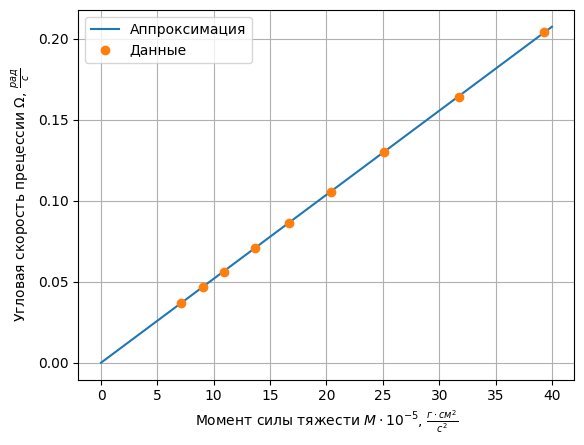

In [ ]:
plt.plot((0, 40), (0, k*4000000))
plt.errorbar(x/100000, y, fmt="o")
plt.legend(["Аппроксимация", "Данные"])
plt.xlabel("Момент силы тяжести $%s$, $%s$"%("M \\cdot 10^{-5}", "\\frac{г \\cdot см^2}{с^2}"))
plt.ylabel("Угловая скорость прецессии $%s$, $%s$"%("\\Omega", "\\frac{рад}{с}"))
plt.grid()

Inputs

In [ ]:
cyl_amounts = []
cyl_times = []
rot_amounts = []
rot_times = []
with open("measurements_2.txt", "r") as f:
    print(f.readline())
    for _ in range(4):
        temp = f.readline().strip().split()
        cyl_amounts.append(float(temp[0]))
        cyl_times.append(float(temp[1]))
    print(f.readline())
    for _ in range(4):
        temp = f.readline().strip().split()
        rot_amounts.append(float(temp[0]))
        rot_times.append(float(temp[1]))
cyl_amounts = np.array(cyl_amounts)
cyl_times = np.array(cyl_times)
rot_amounts = np.array(rot_amounts)
rot_times = np.array(rot_times)

cylinder

rotor



In [ ]:
with open("constants.txt", "r") as f:
    print(f.readline())
    temp = f.readline().strip().split()
    cyl_mass = float(temp[0])
    cyl_diam = float(temp[1])

Cylinder mass diameter height



In [ ]:
instrum_diam = 0.01

Permutations

In [ ]:
mean_rot_period = np.mean(rot_times/rot_amounts)
random_rot_period = ((1/(rot_times.size * (rot_times.size - 1))) * np.sum((rot_times/rot_amounts - mean_rot_period)**2))**0.5
instrum_rot_period = mean_rot_period * instrum_time/np.mean(rot_times)
sigma_rot_period = (random_rot_period**2 + instrum_rot_period**2)**0.5
printMeaningful(mean_rot_period, sigma_rot_period)

'(32000.0 \\pm 5.0) \\cdot 10^{-4}'

In [ ]:
mean_cyl_period = np.mean(cyl_times/cyl_amounts)
random_cyl_period = ((1/(cyl_times.size * (cyl_times.size - 1))) * np.sum((cyl_times/cyl_amounts - mean_cyl_period)**2))**0.5
instrum_cyl_period = mean_cyl_period * instrum_time/np.mean(cyl_times)
sigma_cyl_period = (random_cyl_period**2 + instrum_cyl_period**2)**0.5
printMeaningful(mean_cyl_period, sigma_cyl_period)

'(40666.7 \\pm 6.7) \\cdot 10^{-4}'

In [ ]:
I = (cyl_mass * cyl_diam**2 * mean_rot_period**2)/(8 * mean_cyl_period**2)
sigma_I = I * ((instrum_mass/cyl_mass)**2 + 4 * (instrum_diam/cyl_diam)**2 + 4 * (sigma_rot_period/mean_rot_period)**2 + 4 * (sigma_cyl_period/mean_cyl_period)**2)**0.5

In [ ]:
printMeaningful(I, sigma_I)

'(749.7 \\pm 2.0) \\cdot 10^{1}'

In [ ]:
omega = L/I

In [ ]:
sigma_omega = omega * ((sigma_L/L)**2 + (sigma_I/I)**2)**0.5

In [ ]:
printMeaningful(omega, sigma_omega)

'(257.2 \\pm 2.3) \\cdot 10^{1}'

In [ ]:
printMeaningful(omega/(2*np.pi), sigma_omega/(2*np.pi))

'(409.4 \\pm 3.6) \\cdot 10^{0}'

Friction

In [ ]:
omega_frict = mean_delta_hs / (l * mean_times)
mean_omega_frict = np.mean(omega_frict)
instrum_omega_frict = np.mean(omega_frict) * ((instrum_delta_h/np.mean(mean_delta_hs))**2 + (sigma_l/l)**2 + (instrum_time/np.mean(mean_times))**2)**0.5
random_omega_frict = ((1 / (omega_frict.size * (omega_frict.size - 1))) * np.sum((omega_frict - mean_omega_frict)**2))**0.5
sigma_omega_frict = (instrum_omega_frict**2 + random_omega_frict**2)**0.5


In [ ]:
printMeaningful(mean_omega_frict, sigma_omega_frict)

'(131.3 \\pm 9.4) \\cdot 10^{-5}'

In [ ]:
M_frict = L * mean_omega_frict
sigma_M_frict = M_frict * ((sigma_L/L)**2 + (sigma_omega_frict/np.mean(omega_frict))**2)**0.5

In [ ]:
printMeaningful(M_frict, sigma_M_frict)

'(25.3 \\pm 1.8) \\cdot 10^{3}'

In [ ]:
for i in range(len(masses)):
    print("\t\t\hline\n\t\t", end = "")
    print("{}&${}$&${:.0f}$&${}$&${}$&${}$\\\\".format(i+1, masses[i], amount[i], time[i], h1[i], h2[i]))

		\hline
		1&$60.6$&$1$&$169.0$&$13.0$&$10.3$\\
		\hline
		2&$60.6$&$1$&$170.0$&$13.5$&$10.8$\\
		\hline
		3&$60.6$&$1$&$171.0$&$13.5$&$10.9$\\
		\hline
		4&$60.6$&$1$&$171.0$&$13.5$&$10.7$\\
		\hline
		5&$334.0$&$3$&$92.0$&$13.4$&$11.9$\\
		\hline
		6&$334.0$&$3$&$92.0$&$13.6$&$12.1$\\
		\hline
		7&$334.0$&$3$&$92.0$&$13.5$&$12.0$\\
		\hline
		8&$334.0$&$3$&$93.0$&$13.5$&$12.0$\\
		\hline
		9&$334.0$&$3$&$92.0$&$13.3$&$11.8$\\
		\hline
		10&$269.4$&$4$&$153.0$&$13.2$&$10.9$\\
		\hline
		11&$269.4$&$4$&$153.0$&$13.3$&$10.9$\\
		\hline
		12&$213.4$&$2$&$96.0$&$13.4$&$11.9$\\
		\hline
		13&$213.4$&$2$&$97.0$&$13.4$&$11.9$\\
		\hline
		14&$173.0$&$2$&$119.0$&$13.5$&$11.6$\\
		\hline
		15&$173.0$&$2$&$119.0$&$13.1$&$11.3$\\
		\hline
		16&$141.6$&$2$&$146.0$&$13.5$&$11.3$\\
		\hline
		17&$141.6$&$2$&$146.0$&$13.5$&$11.3$\\
		\hline
		18&$116.0$&$2$&$178.0$&$13.4$&$10.8$\\
		\hline
		19&$116.0$&$2$&$178.0$&$13.3$&$10.9$\\
		\hline
		20&$92.6$&$1$&$112.0$&$13.3$&$11.3$\\
		\hline
		21&$92.6$&

In [ ]:
for i in range(mean_masses.size):
    print("\t\t\hline\n\t\t", end = "")
    print("{}&${}$&${:.0f}$&${}$&${:.1f}$\\\\".format(i+1, mean_masses[i], mean_amounts[i], mean_times[i], mean_delta_hs[i]))

		\hline
		1&$60.6$&$1$&$170.25$&$2.7$\\
		\hline
		2&$334.0$&$3$&$92.2$&$1.5$\\
		\hline
		3&$269.4$&$4$&$153.0$&$2.3$\\
		\hline
		4&$213.4$&$2$&$96.5$&$1.5$\\
		\hline
		5&$173.0$&$2$&$119.0$&$1.8$\\
		\hline
		6&$141.6$&$2$&$146.0$&$2.2$\\
		\hline
		7&$116.0$&$2$&$178.0$&$2.5$\\
		\hline
		8&$92.6$&$1$&$112.0$&$2.0$\\
		\hline
		9&$76.5$&$1$&$135.0$&$2.2$\\


In [ ]:
for i in range(cyl_amounts.size):
    print("\t\t\t\t\hline\n\t\t\t\t", end = "")
    print("${:.0f}$&${:.0f}$&${:.0f}$&${:.0f}$\\\\".format(cyl_amounts[i], cyl_times[i], rot_amounts[i], rot_times[i]))

				\hline
				$15$&$61$&$20$&$64$\\
				\hline
				$15$&$61$&$20$&$64$\\
				\hline
				$15$&$61$&$20$&$64$\\
				\hline
				$15$&$61$&$20$&$64$\\


In [ ]:
sigma_omega/omega

0.008798625206954099

In [ ]:
omega/np.max(mean_omegas)

12582.313792428862

In [ ]:
sigma_M_frict / M_frict

0.0721517169154568